In [2050]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2051]:
#load the data
train_dropout_data = pd.read_csv('data/train.csv')
test_dropout_data = pd.read_csv('data/test.csv')
validation_dropout_data = pd.read_csv('data/validation.csv')

In [2052]:
train_dropout_data

,Id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Category
0,3222,1,1,1,14,1,1,1,13,28,...,0,6,7,6,14.714286,0,11.1,0.6,2.02,Graduate
1,2388,1,8,4,9,1,1,1,23,14,...,0,5,10,2,12.500000,0,11.1,0.6,2.02,Dropout
2,1865,1,12,1,17,0,1,1,1,1,...,0,5,5,5,12.400000,0,15.5,2.8,-4.06,Graduate
3,652,1,12,1,12,1,12,1,1,5,...,0,8,11,7,12.614286,0,12.7,3.7,-1.70,Graduate
4,4220,1,1,1,14,1,1,1,19,28,...,0,5,5,0,0.000000,0,9.4,-0.8,-3.12,Dropout
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2471,4286,1,1,1,6,1,1,1,22,14,...,0,5,9,4,13.666667,1,10.8,1.4,1.74,Graduate
2472,4399,1,1,1,11,1,1,1,22,14,...,0,6,6,6,14.333333,0,9.4,-0.8,-3.12,Graduate
2473,3526,2,12,1,4,1,1,1,1,3,...,2,7,7,5,11.200000,0,8.9,1.4,3.51,Dropout
2474,1050,1,1,1,2,1,1,1,1,28,...,0,0,0,0,0.000000,0,13.9,-0.3,0.79,Graduate


,Id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Category
Id,1.00,0.06,0.03,-0.01,-0.02,-0.04,-0.02,0.00,0.06,0.07,...,0.05,0.03,0.03,0.01,-0.01,0.00,-0.03,0.02,-0.01,-0.04
Marital status,0.06,1.00,0.23,-0.13,0.02,-0.29,0.13,-0.02,0.18,0.12,...,0.08,0.05,0.03,-0.02,-0.05,0.01,-0.03,0.00,-0.01,-0.08
Application mode,0.03,0.23,1.00,-0.23,-0.07,-0.27,0.42,0.00,0.09,0.08,...,0.24,0.13,0.16,-0.05,-0.09,0.04,0.07,-0.02,-0.01,-0.20
Application order,-0.01,-0.13,-0.23,1.00,0.12,0.16,-0.19,-0.04,-0.09,-0.08,...,-0.13,0.02,-0.05,0.06,0.05,-0.02,-0.10,-0.03,0.03,0.10
Course,-0.02,0.02,-0.07,0.12,1.00,-0.04,-0.14,-0.00,0.03,0.03,...,-0.13,0.19,0.04,0.12,0.18,-0.03,-0.04,0.05,-0.02,0.01
Daytime/evening attendance,-0.04,-0.29,-0.27,0.16,-0.04,1.00,-0.12,0.03,-0.20,-0.15,...,-0.10,0.00,0.03,0.04,0.05,-0.02,0.07,-0.03,0.02,0.06
Previous qualification,-0.02,0.13,0.42,-0.19,-0.14,-0.12,1.00,-0.03,0.01,0.01,...,0.14,0.07,0.10,-0.03,-0.04,0.03,0.07,-0.07,0.08,-0.09
Nacionality,0.00,-0.02,0.00,-0.04,-0.00,0.03,-0.03,1.00,-0.04,-0.10,...,0.00,-0.01,0.00,-0.02,-0.00,0.01,-0.01,-0.00,0.05,-0.01
Mother's qualification,0.06,0.18,0.09,-0.09,0.03,-0.20,0.01,-0.04,1.00,0.53,...,0.04,0.01,0.00,-0.04,-0.05,0.04,-0.10,0.03,-0.10,-0.04
Father's qualification,0.07,0.12,0.08,-0.08,0.03,-0.15,0.01,-0.10,0.53,1.00,...,0.04,0.00,-0.00,-0.01,-0.02,0.02,-0.08,0.05,-0.09,-0.01


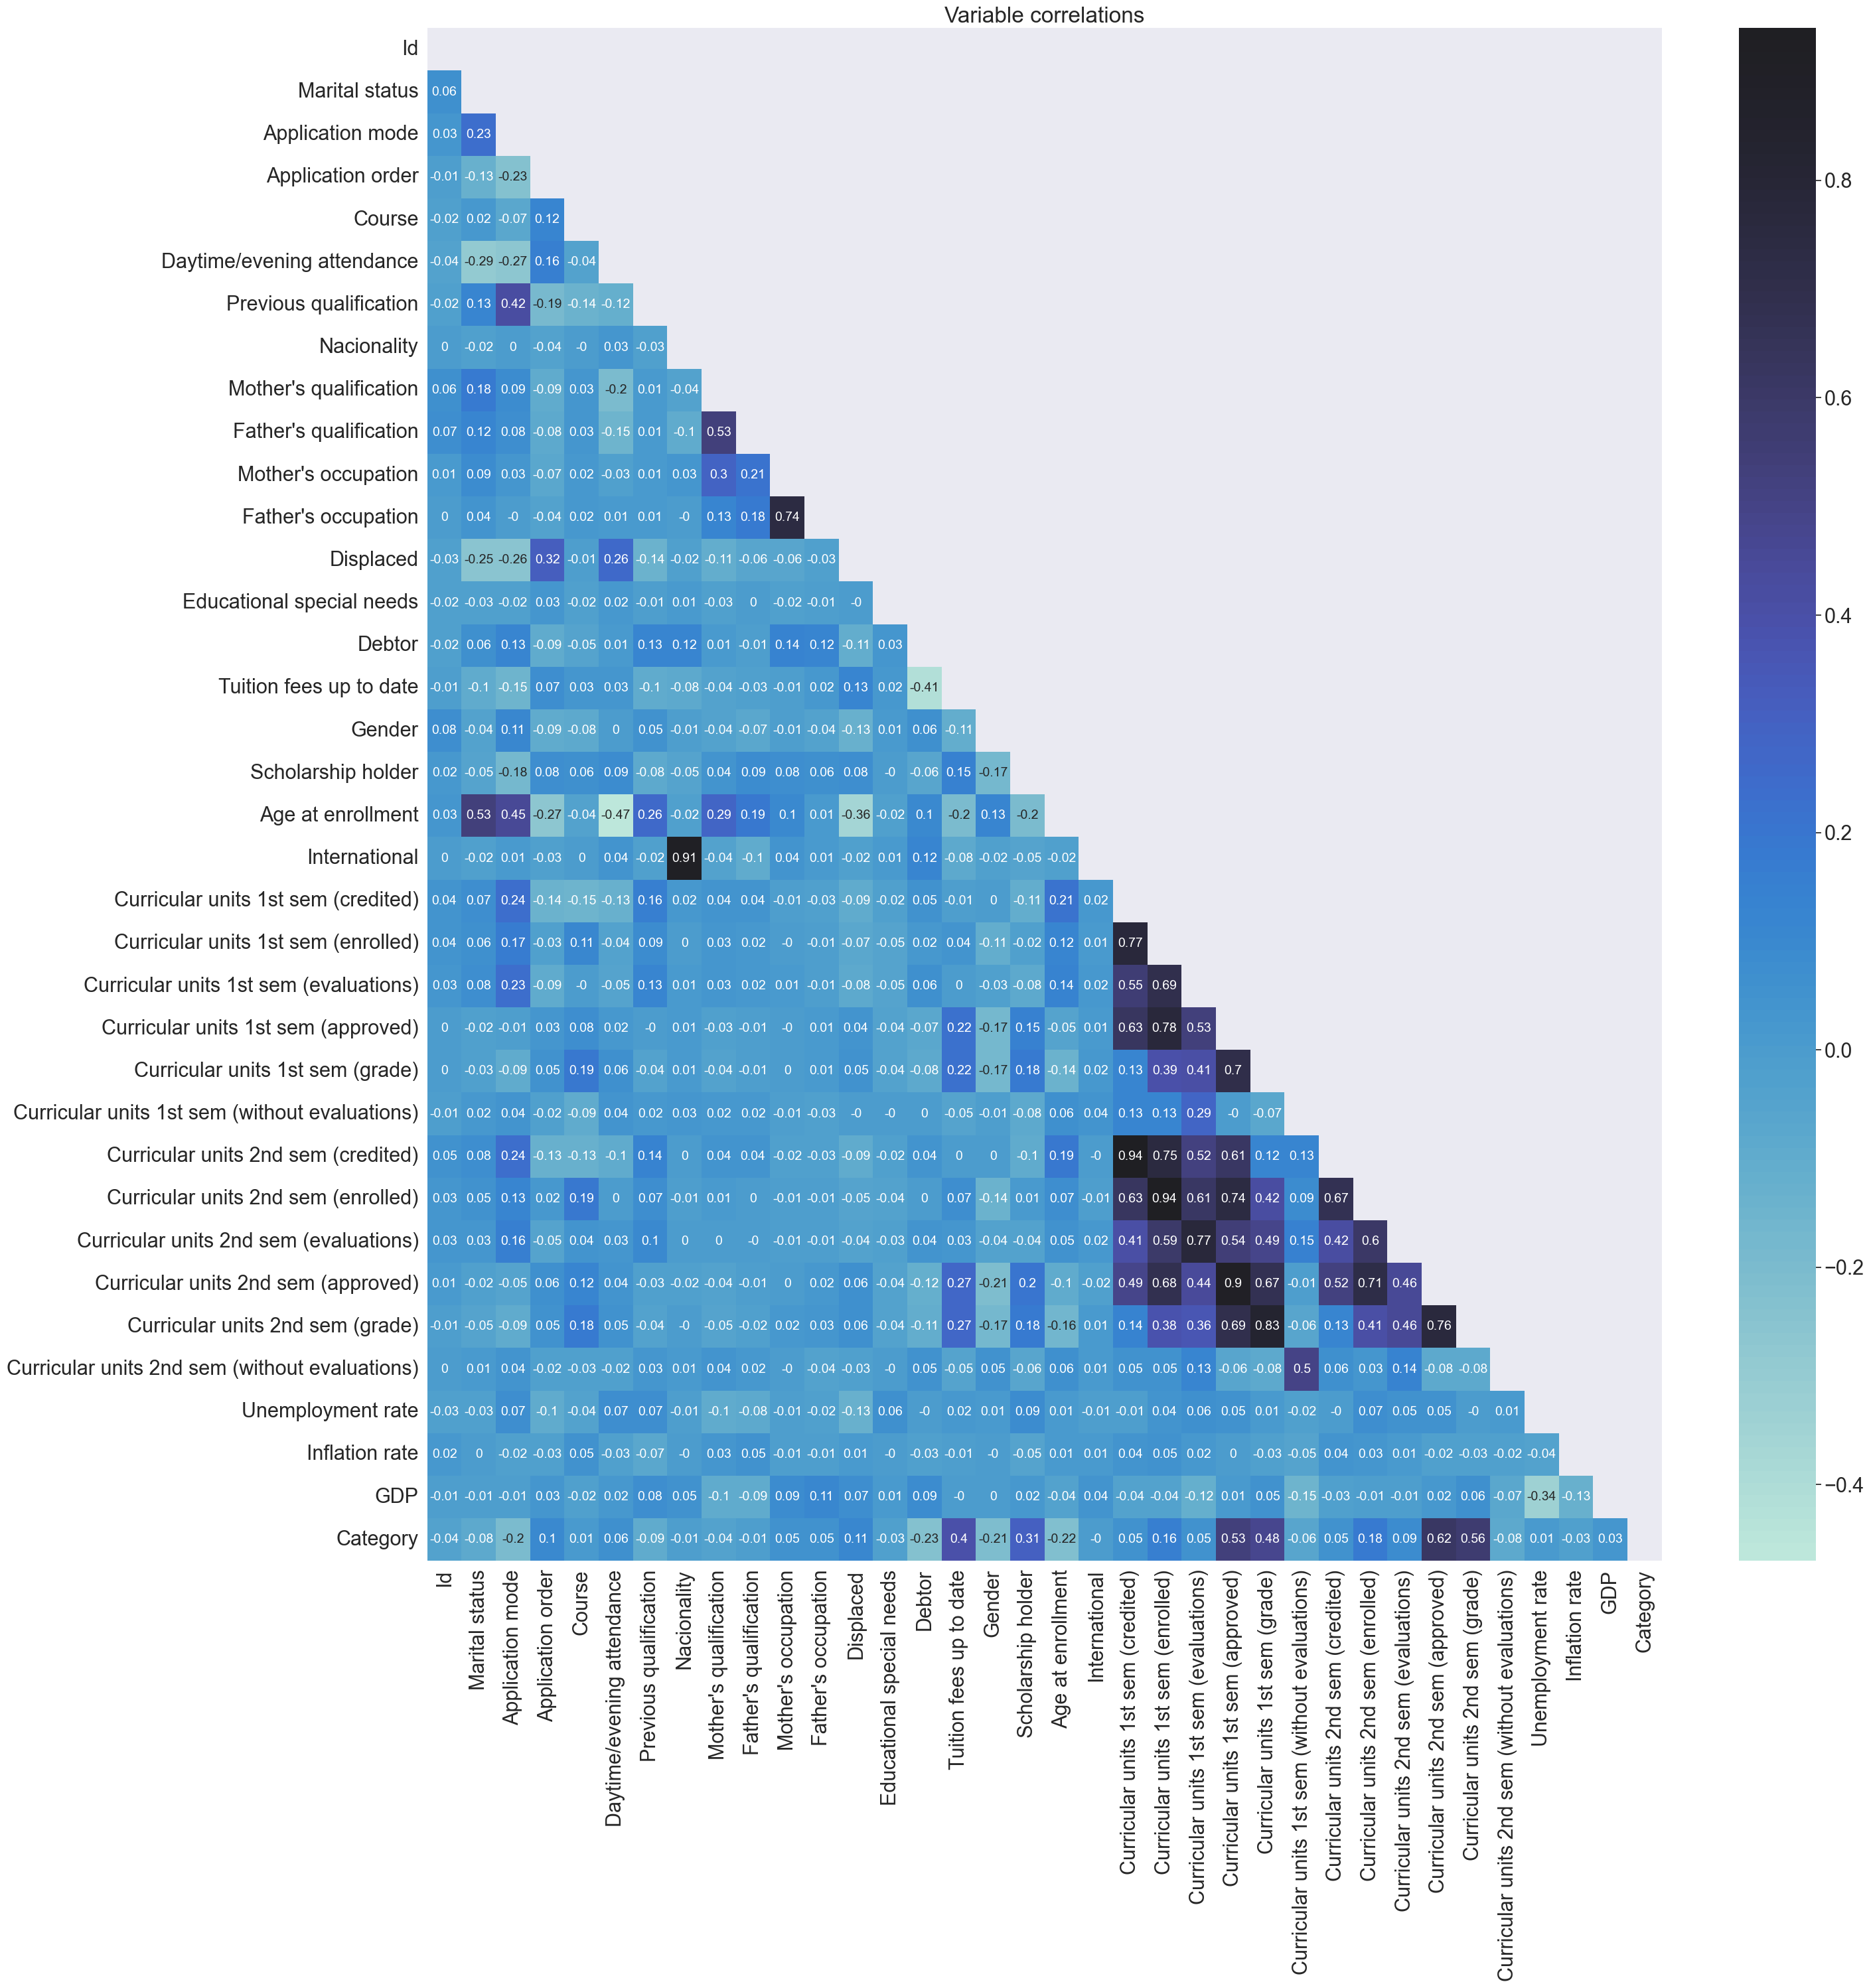

In [2053]:
# clean Category column
# Graduated = 2; Enrolled = 1; Dropout = 0
train_dropout_data_2 = pd.DataFrame(train_dropout_data).copy(deep=True)

train_dropout_data_2['Category'].replace(['Graduate'],2, inplace=True)
train_dropout_data_2['Category'].replace(['Enrolled'],1, inplace=True)
train_dropout_data_2['Category'].replace(['Dropout'],0, inplace=True)

# explore and understand the data
# Define the plot
fig, ax = plt.subplots(figsize=(30,30))

# Add title to the Heat map
title = 'Variable correlations'

# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=24)


# Use the heatmap function from the seaborn package
correlation = train_dropout_data_2.corr().round(2)
mask = np.triu(np.ones_like(correlation, dtype=bool))

correlation_heatmap = sns.heatmap(correlation,annot=True, mask=mask ,center=1, cbar = True,annot_kws={"size":14})
correlation


[Text(0.5, 1.0, 'Category correlations')]

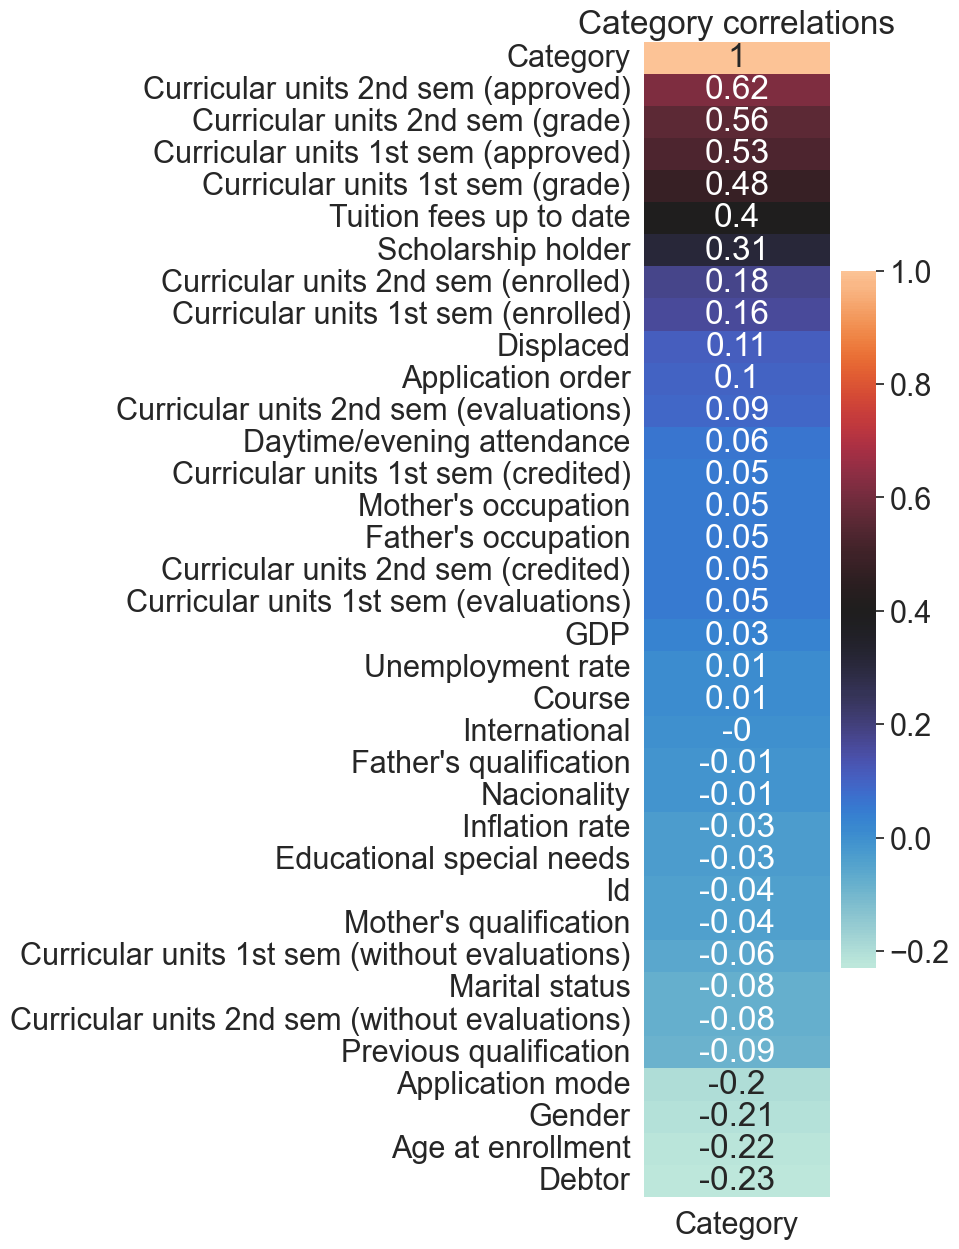

In [2054]:
fig, ax = plt.subplots(figsize=(3,15))

sns.heatmap(correlation[['Category']].sort_values('Category',ascending=False ),annot=True ,center=0.4, annot_kws={"size":24}).set(title='Category correlations')


In [2055]:
# format the training data for machine learning
X_train=train_dropout_data.drop('Category',axis=1).drop('Id',axis=1) 
y_train=train_dropout_data['Category'] 

In [2056]:
# format the validation data for machine learning
X_validation=validation_dropout_data.drop('Category',axis=1).drop('Id',axis=1) 
y_validation=validation_dropout_data['Category'] 
y_validation

0        Dropout
1       Graduate
2       Graduate
3       Graduate
4        Dropout
          ...   
1323    Graduate
1324    Graduate
1325    Graduate
1326    Enrolled
1327    Graduate
Name: Category, Length: 1328, dtype: object

In [2057]:
# format the test data for machine learning
X_test= test_dropout_data.drop('Id',axis=1) 
# this data comes without target


In [2058]:
# print(X.dtypes)
# X.head()

In [2059]:
# # FLAML
# from flaml import AutoML

# automl = AutoML()

# automl.fit(X_train, y_train, task="classification")

In [2060]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Declare an instance of it
classifier = RandomForestClassifier(n_estimators=25)
#gradient boosting?
#xj boost

# Fit the model
classifier = classifier.fit(X_train,y_train)
# Generate prediction
y_pred=classifier.predict(X_test)
y_pred


array(['Dropout', 'Graduate', 'Graduate', 'Dropout', 'Graduate',
       'Graduate', 'Enrolled', 'Enrolled', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Dropout',
       'Dropout', 'Graduate', 'Graduate', 'Enrolled', 'Dropout',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Enrolled',
       'Dropout', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Dropout', 'Enrolled', 'Enrolled',
       'Graduate', 'Graduate', 'Dropout', 'Enrolled', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Dropout',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Dropout',
       'Dropout', 'Graduate', 'Graduate', 'Graduate', 'Dropout',
       'Dropout', 'Graduate', 'Graduate', 'Graduate', 'Enrolled',
       'Graduate', 'Graduate', 'Graduate', 'Enrolled', 'Graduate',
       'Dropout', 'Dropout', 'Dropout', 'Enrolled', 'Graduate',
       'Graduate', 'Dropout', 'Graduate', 'Graduate', 'Dropout',
       'Dropo

In [2061]:
# # Accuracy score for each class
# from sklearn.metrics import classification_report, confusion_matrix, precision_score
# precision_score = precision_score(y_validation, y_pred, average="weighted")

# matrix = confusion_matrix(y_validation, y_pred)
# # matrix
# print("precision score", precision_score)
# print("confusion matrix", matrix)
# o = classification_report(y_pred, y_validation)
# print(o)

/var/folders/vl/8lln9s0x0198jc8m81yt74nm0000gn/T/ipykernel_62075/1775459260.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_Dropout = Xy_pred.corr().round(2)


KeyError: "None of [Index(['Category'], dtype='object')] are in the [columns]"

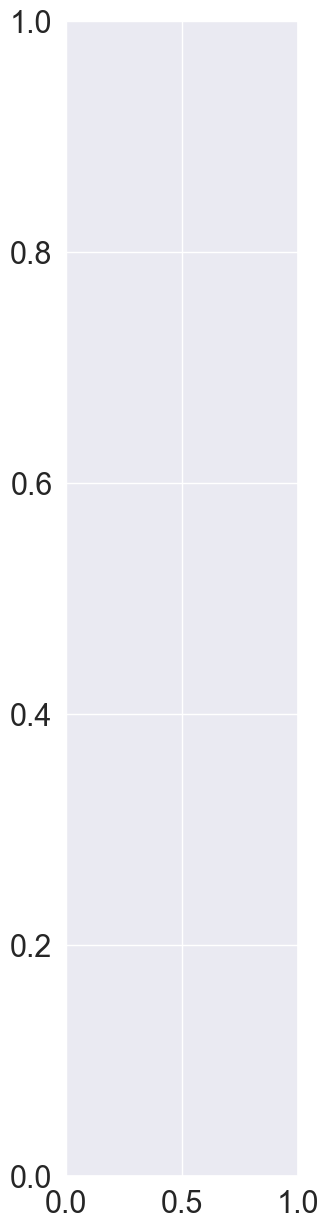

In [2062]:
# Correalation for Dropout

Xy_pred = pd.DataFrame(X_test)
Xy_pred["Category"] = y_pred

correlation_Dropout = Xy_pred.corr().round(2)
ig, ax = plt.subplots(figsize=(3,15))

sns.heatmap(correlation_Dropout[['Category']].sort_values('Category',ascending=False ),annot=True ,center=0.4, annot_kws={"size":24}).set(title='Dropout correlations')
print(Xy_pred)

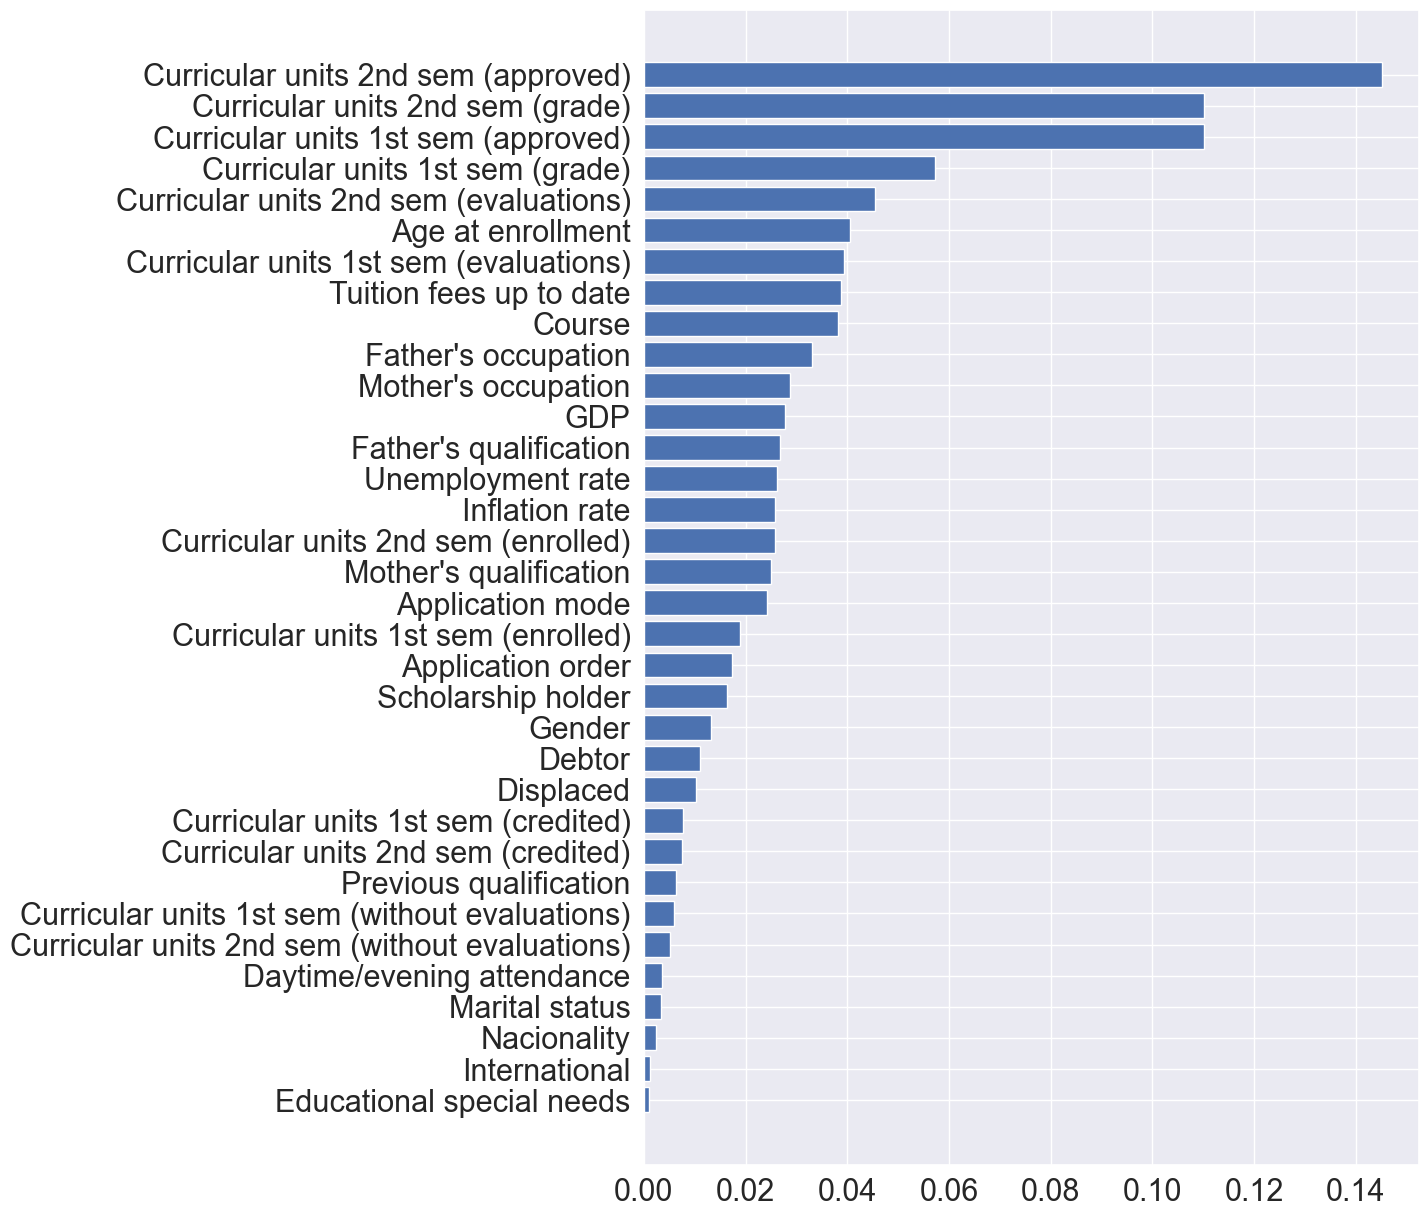

In [ ]:
# Featuer importance
importances = classifier.feature_importances_
# title = 'Variable importances used in model'
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10,15))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])
sns.set(font_scale=2)

In [ ]:
# Generate CSV
sample_data = pd.read_csv('data/sample_submission.csv')
id_column= sample_data['Id']
droupout_prediction=pd.DataFrame({
            'Id':id_column,
            'Category':y_pred[0:len(id_column)],
}, columns= ['Id', 'Category'])
droupout_prediction.to_csv("dropout_prediction.csv", index=False)
droupout_prediction

,Id,Category
0,3557,Dropout
1,1980,Graduate
2,1112,Graduate
3,2914,Graduate
4,2745,Dropout
...,...,...
615,335,Graduate
616,1639,Enrolled
617,1381,Dropout
618,2455,Dropout


In [ ]:
# Evaluate the model
print("Model score on training data: ", classifier.score(X_train, y_train))
print("Model score on test data: ", classifier.score(X_validation, y_validation))


Model score on training data:  0.9987883683360258
Model score on test data:  0.7439759036144579


In [ ]:
# # Graph overfitting
# from matplotlib import pyplot
# # define the tree depths to evaluate
# values = [i for i in range(1, 4)]
# train_scores, test_scores = list(), list()
# train_scores.append(classifier.score(X_train, y_train))
# test_scores.append(classifier.score(X_validation, y_validation))

# pyplot.plot(values, train_scores, '-o', label='Train')
# pyplot.plot(values, test_scores, '-o', label='Test')
# pyplot.legend()
# pyplot.show()

# plt.plot(p, q, color = 'c', label="Actual")
# plt.plot(p, q, edgecolor='r', s=20, label="Samples")
# plt.xlabel("p")
# plt.ylabel("q")
# plt.legend(loc="best")
# plt.show()

# plt.plot(p, q, color = 'c', label="Actual")
# plt.scatter(p, q, edgecolor='r', s=20, label="Samples")
# plt.xlabel("p")
# plt.ylabel("q")
# plt.legend(loc="best")
# plt.show()

In [ ]:
# Evaluate the model
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
"Balanced accuracy:",metrics.balanced_accuracy_score(y_validation[0:len(y_pred)], y_pred)

('Balanced accuracy:', 0.6510451324870551)

In [ ]:
# Calculating accuracy per row
y_pred


array(['Dropout', 'Graduate', 'Graduate', ..., 'Graduate', 'Dropout',
       'Dropout'], dtype=object)

In [ ]:
# # F1 score [0:len(y_pred)]
# # for i in range(len(y_pred)):
# #     print("F1 score: ", metrics.f1_score(y_validation[i], y_pred[i], average="weighted"))
# for i in range(len(y_pred)):
#     # print(y_pred)
#     print("Balanced accuracy:",metrics.balanced_accuracy_score(y_validation[i], y_pred[i]))

#     # print(metrics.f1_score([y_validation[i]], [y_pred[i]], average="weighted"))

ValueError: Expected array-like (array or non-string sequence), got 'Dropout'